<a href="https://colab.research.google.com/github/RocioLiu/ML_Resources/blob/master/Geron_ch10_Intro_to_ANN_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**The Perceptron**
Implement a single-TLU (*threshold logic unit*) network

In [0]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [0]:
iris = load_iris()
print(type(iris.data))
print(iris.data.shape)
print(type(iris.target))
print(iris.target.shape)
print(iris.target)

<class 'numpy.ndarray'>
(150, 4)
<class 'numpy.ndarray'>
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [0]:
X = iris.data[:, (2,3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) #Iris setosa?

In [0]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_pred = per_clf.predict([[2, 0.5]])

  ## --

## **Implementing MLPs with Keras**

### **Installing TensorFlow 2**

In [0]:
#!pip install --upgrade tensorflow
#!pip uninstall tensorflow
!pip install tensorflow==2.0.0

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


Another way to install TensorFlow :

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
try:
  import tensorflow.compat.v2 as tf
except Exception:
  pass

tf.enable_v2_behavior()

print(tf.__version__)

1.15.0


### **Building an Image Classifier Using the Sequential API**

* #### Using Keras to load the dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [0]:
# The dataset is already split into a training set and test set, but there's no validation set, so we'll create one now.
# Additionally, since we're going to train the NN using Gradient Descent, we must scale the input features.
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [0]:
# We need a list of class names to know what we are dealing with:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [0]:
class_names[y_train[0]]

'Coat'

* #### Getting the model using the Sequential API

In [0]:
# Build a classification MLP with two hidden layers
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [0]:
# Instead of adding athe layers one by one as we just did, we can pass a list of layers when creating the Sequential model
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Get the model's list of layers
model.layers

In [0]:
# fetch a layer by its index
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [0]:
# fetch a layer by its name
model.get_layer('dense_3') is hidden1

True

In [0]:
# All the parameters of a layer can be accessed using its "get_weight()" and "set_weight()" methods
weights, biases = hidden1.get_weights()
#print(weights)
print(weights.shape)
#print(biases)
print(biases.shape)

# Notice that the Dense layer initialized the connection weights randomly (which is needed to break symmetry), 
# and the biases were initialized to 0s)

(784, 300)
(300,)


* #### Compiling the model
After a model is created, we must call its `compile()` methos to specify the loss funcion and the optimizer to use.

* `sparse_categorical_crossentropy` loss for sparse labels (e.g. 0, 1, ..., 9)

* `categorical_crossentropy` loss if one target probability per class (such as one-hot vector)

* `binary_crossentropy` loss for binary classification

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

* #### Traiing and evaluating the model
Now the model is ready to be trained. For this we simply need to call its `fit()` method

In [0]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 9s 162us/sample - loss: 0.7267 - accuracy: 0.7634 - val_loss: 0.5525 - val_accuracy: 0.8104
Epoch 2/30
55000/55000 [==============================] - 7s 127us/sample - loss: 0.4899 - accuracy: 0.8302 - val_loss: 0.4762 - val_accuracy: 0.8330
Epoch 3/30
55000/55000 [==============================] - 7s 124us/sample - loss: 0.4450 - accuracy: 0.8429 - val_loss: 0.4226 - val_accuracy: 0.8564
Epoch 4/30
55000/55000 [==============================] - 7s 125us/sample - loss: 0.4172 - accuracy: 0.8531 - val_loss: 0.3958 - val_accuracy: 0.8616
Epoch 5/30
55000/55000 [==============================] - 7s 126us/sample - loss: 0.3964 - accuracy: 0.8604 - val_loss: 0.3817 - val_accuracy: 0.8668
Epoch 6/30
55000/55000 [==============================] - 6s 115us/sample - loss: 0.3791 - accuracy: 0.8658 - val_loss: 0.3972 - val_accuracy: 0.8642
Epoch 7/30
55000/55000 [===========================

In [0]:
print(history.params)  # The training parameters
print(history.epoch)   # The list of epochs it went through
print(history.history) # A dictionary containing the loss and extra metrics it measured at the end of each epoch on the training set 
                      # and the validation set

{'batch_size': 32, 'epochs': 30, 'steps': 1719, 'samples': 55000, 'verbose': 0, 'do_validation': True, 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
{'loss': [0.7266931029536507, 0.48989510472471065, 0.4450046572555195, 0.41723152974735606, 0.3964259020805359, 0.3790959351669658, 0.36633945042653515, 0.35526355828371914, 0.34355224726850336, 0.33448938221714714, 0.32538537524613464, 0.31809633984132246, 0.31062045509598474, 0.30371643628423867, 0.29643021681308745, 0.2911188094139099, 0.285340710735321, 0.27882462786652823, 0.27530007649768484, 0.2693279897364703, 0.2658248386160894, 0.2599608641321009, 0.25542428789680655, 0.25123820665749635, 0.24760989378907464, 0.2429476567138325, 0.239574140968106, 0.23375835678794168, 0.23170318324024028, 0.227088318956982], 'accuracy': [0.76336366, 0.8302, 0.8428909, 0.8531455, 0.86038184, 0.8658, 0.86985457, 0.87365454, 

(0, 1)

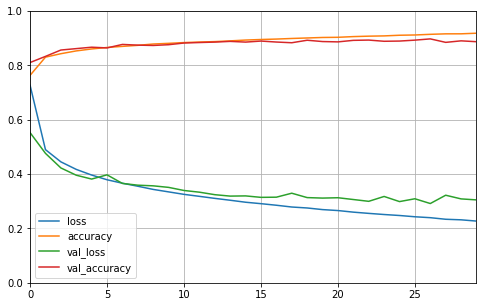

In [0]:
# Create a pandas DataFrame of history.history and plot it
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0 - 1]


If the validation loss is still going down, we should probably continue training. we can simply call `fit()` mothod again, since Keras just continues training where it left off.

If we are not satisfied with the performance of our model, we should go back and tune the hyperparameters. the first one to check is the learning rate. ...

Once we are satisfied with our model's validation accuracy, we should evaluate it on the test set to estimate the generalization error before we deploy the model to production.

In [0]:
model.evaluate(X_test, y_test)

* #### Using the model to make predictions
Next, We can use the model's `predict()` method to make predictions on new instances. (Since we don;t have actual new instances, we will just use the first three instances of the test case.

In [0]:
X_new = X_test[:3]
# For each instance, the model estimates one probability per class, from class 0 to class 9
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# If we only care about the class with the highest estimated probability, then we can use the `predict_classes()` method instead.
y_pred = model.predict_classes(X_new)
print(y_pred)
print(np.array(class_names)[y_pred])

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


In [0]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## --



### **Building a Regression MLP Using the Sequential API**

In [0]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
housing = fetch_california_housing()
type(housing)

sklearn.utils.Bunch

In [0]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [0]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [0]:
print(X_train.shape)

(11610, 8)


In [0]:
model = keras.models.Sequential([
  keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
  keras.layers.Dense(1)                                                                 
])
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
#y_pred = model.predict(X_new)

### **Buiding Complex Models Using the Functional API**
One example of a nonsequential neural network is a *Wide and Deep* neural network. It connects all or part of the inputs directly to the output layers.

In [0]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

But if we want to send a subset of the features through the wide path and a different subset through the deep path? e.g. suppose we want to send 5 features through the wide path and 6 features through the deep path:


In [0]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="Deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

When we call the `fit()` method then, we must pass a pair of matrics (X_train_A, X_train_B): one per input. Also for X_valid and X_test when we call `evaluate()` or `predict()`

In [0]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [0]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pres = model.predict((X_new_A, X_new_B))

We can handle multiple outputs, below example is to add an auxiliary output for regularization. We add auxiliary outputs in a neural network architecture to ensure that the underlying part of the network learns something useful on its ownm without relying on the rest of the network.

In [0]:
# The shallow layers layers are the same as above, up to the main output layer
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

Each outputs will need its own loss function. Therefore, when we compile the model, we should pass a list of losses (If we pass a single loss, Keras will assume that the same loss must be used for all outputs). By default, Keras will compute  all these losses and simply add them up to get the final loss used for training. We want to guve the main output's loss a much greater weight. 

In [0]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

When we train the model, we need to provide labels for each output.

In [0]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])
)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 73us/sample - loss: 0.3700 - main_output_loss: 0.3565 - aux_output_loss: 0.4916 - val_loss: 0.3684 - val_main_output_loss: 0.3564 - val_aux_output_loss: 0.4788
Epoch 2/20
11610/11610 [==============================] - 1s 74us/sample - loss: 0.3642 - main_output_loss: 0.3508 - aux_output_loss: 0.4848 - val_loss: 0.3695 - val_main_output_loss: 0.3588 - val_aux_output_loss: 0.4678
Epoch 3/20
11610/11610 [==============================] - 1s 74us/sample - loss: 0.3601 - main_output_loss: 0.3471 - aux_output_loss: 0.4756 - val_loss: 0.4033 - val_main_output_loss: 0.3963 - val_aux_output_loss: 0.4675
Epoch 4/20
11610/11610 [==============================] - 1s 72us/sample - loss: 0.3651 - main_output_loss: 0.3537 - aux_output_loss: 0.4689 - val_loss: 0.4048 - val_main_output_loss: 0.3965 - val_aux_output_loss: 0.4809
Epoch 5/20
11610/11610 [==============================] - 1s 73us/s

When we evaluate the model, Keras will return the total loss, as well as all the individual losses:

In [0]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Similary, the `predict()` methods will return predictions for each ouput: 

In [0]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

### **Using the Subclass API to Build Dynamic Models**
Simply subclass the `Model` class, create the layers we need in the constructor, and use them to perform the computations you want in the `call()` method. for example, creating an instance of the following `WideAndDeepModel` class gives us an equivalent model to the one we just build with Functional API.
Refer to [tf.keras.Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model)

In [0]:
class WideAndDeepModel(keras.Model):
  def __init__(self, units=30, activation="relu", **kwargs):
    super().__init__(**kwargs) # handles standard args (e.g., name)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([inputA, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)

model = WideAndDeepModel()

### **Saving and Restoring a Model**
Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models, because such models are defined via the body of a Python method, which isn't safely serializable. Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.

In [0]:
# model = keras.layers.Sequential([...]) # or Keras.Model([...])
# model.compile([...])
# model.fit([...])
model.save("my_keras_model.h5")

Load the model:

In [0]:
model2 = keras.models.load_model("my_keras_model.h5")

In [0]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


### **Using Callbacks**
When traiing on large dataset, we should not only save our model st the end of training, but also save checkpoints st regular intervals during training to avoid losing  everything if our computer crash.
But how can we twll the `fit()` method to save checkpoints? Use *callbacks*.

The `fit()` method accepts a `callbacks` argument that lets us specify a list of objects that Keras will call at the start and end of training, at the start and end of each epoch, and even before and after processing each batch.

e.g. the `ModelCheckpoint` callback saves checkpoints of out model st regular  intervals during training, by default st the end of each epoch.

In [0]:
# [...] biuld and compile the model
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Train on 55000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 137us/sample - loss: 0.7339 - accuracy: 0.7566
Epoch 2/10
55000/55000 [==============================] - 7s 133us/sample - loss: 0.4941 - accuracy: 0.8275
Epoch 3/10
55000/55000 [==============================] - 7s 134us/sample - loss: 0.4485 - accuracy: 0.8431
Epoch 4/10
55000/55000 [==============================] - 7s 130us/sample - loss: 0.4220 - accuracy: 0.8519
Epoch 5/10
55000/55000 [==============================] - 8s 147us/sample - loss: 0.4013 - accuracy: 0.8586
Epoch 6/10
55000/55000 [==============================] - 8s 137us/sample - loss: 0.3849 - accuracy: 0.8637
Epoch 7/10
55000/55000 [==============================] - 7s 136us/sample - loss: 0.3711 - accuracy: 0.8675
Epoch 8/10
55000/55000 [==============================] - 8s 141us/sample - loss: 0.3592 - accuracy: 0.8731
Epoch 9/10
55000/55000 [==============================] - 7s 136us/sample - loss: 0.3481 - accuracy: 0.8768
Epoch

Moreover, if we use a validation set during training, we can set `save_best_only=True` when creating the `ModelCheckpoint`, it will only save oue model when its performance in he validation set is the best so far.

The following code is a simple way to implement early stopping:

In [0]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # roll back to best model

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 142us/sample - loss: 0.3299 - accuracy: 0.8823 - val_loss: 0.3373 - val_accuracy: 0.8806
Epoch 2/10
55000/55000 [==============================] - 8s 137us/sample - loss: 0.3215 - accuracy: 0.8851 - val_loss: 0.3344 - val_accuracy: 0.8824
Epoch 3/10
55000/55000 [==============================] - 8s 139us/sample - loss: 0.3144 - accuracy: 0.8877 - val_loss: 0.3459 - val_accuracy: 0.8762
Epoch 4/10
55000/55000 [==============================] - 8s 138us/sample - loss: 0.3077 - accuracy: 0.8883 - val_loss: 0.3327 - val_accuracy: 0.8850
Epoch 5/10
55000/55000 [==============================] - 8s 143us/sample - loss: 0.3015 - accuracy: 0.8917 - val_loss: 0.3231 - val_accuracy: 0.8846
Epoch 6/10
55000/55000 [==============================] - 8s 145us/sample - loss: 0.2944 - accuracy: 0.8932 - val_loss: 0.3131 - val_accuracy: 0.8870
Epoch 7/10
55000/55000 [===========================

Another way to implement early stoping is to simply use the `EarlyStopping` callback. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by `patience` argument), and it will optionally roll back to the best model.

In [0]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 9s 160us/sample - loss: 0.2779 - accuracy: 0.8995 - val_loss: 0.3067 - val_accuracy: 0.8912
Epoch 2/100
55000/55000 [==============================] - 8s 146us/sample - loss: 0.2730 - accuracy: 0.9015 - val_loss: 0.3146 - val_accuracy: 0.8892
Epoch 3/100
55000/55000 [==============================] - 8s 150us/sample - loss: 0.2681 - accuracy: 0.9027 - val_loss: 0.3201 - val_accuracy: 0.8850
Epoch 4/100
55000/55000 [==============================] - 8s 145us/sample - loss: 0.2633 - accuracy: 0.9049 - val_loss: 0.3104 - val_accuracy: 0.8884
Epoch 5/100
55000/55000 [==============================] - 8s 146us/sample - loss: 0.2579 - accuracy: 0.9070 - val_loss: 0.3053 - val_accuracy: 0.8894
Epoch 6/100
55000/55000 [==============================] - 8s 145us/sample - loss: 0.2542 - accuracy: 0.9085 - val_loss: 0.3132 - val_accuracy: 0.8862
Epoch 7/100
55000/55000 [====================

If we need extra control, we can easily write our own custom callbacks.

As an example, the following custom callback will display the ratio between the validation loss and the training loss during training (e.g. to detect overfitting)

In [0]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

### **Using TensorBoard for Visualization**
TensorBoard is a great visualization tool that we can use to view the learning curves during trainingm, comparing curves between multiple runs, ...

To use it, we must modify our program so that it outputs the data we want to visualize to special binary log files calles *event files*.

In [0]:
from tensorflow import keras

In [0]:
import os 
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
  import time
  run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
  return os.path.join(root_logdir, run_id)

In [0]:
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_11_21-14_30_23'
print(run_logdir)

./my_logs/run_2019_11_21-08_32_22


The good news is that Keras provides a nice `TensorBoard()` callback:

In [0]:
# [...] Build and compile our model
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Next we need to start TensorBoard server


In [0]:
%load_ext tensorboard

In [0]:
%tensorboard --logdir my_logs

The following example refers to [Using TensorBoard in Notebooks](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# Load the TensorBoard notebook extension
%load_ext tensorboard

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import datetime, os

In [0]:
print(tf.__version__)

2.0.0


In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Create a very simple model:

In [0]:
def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

Train the model using Keras and the TensorBoard callback:

In [0]:
def train_model():
  
  model = create_model()
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(x=x_train, 
            y=y_train, 
            epochs=5, 
            validation_data=(x_test, y_test), 
            callbacks=[tensorboard_callback])

train_model()

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 204us/sample - loss: 0.4983 - accuracy: 0.8225 - val_loss: 0.4347 - val_accuracy: 0.8448
Epoch 2/5
60000/60000 [==============================] - 11s 191us/sample - loss: 0.3819 - accuracy: 0.8606 - val_loss: 0.3981 - val_accuracy: 0.8593
Epoch 3/5
60000/60000 [==============================] - 11s 184us/sample - loss: 0.3486 - accuracy: 0.8710 - val_loss: 0.3727 - val_accuracy: 0.8640
Epoch 4/5
60000/60000 [==============================] - 11s 186us/sample - loss: 0.3280 - accuracy: 0.8802 - val_loss: 0.3462 - val_accuracy: 0.8747
Epoch 5/5
60000/60000 [==============================] - 11s 180us/sample - loss: 0.3124 - accuracy: 0.8844 - val_loss: 0.3438 - val_accuracy: 0.8759


Start TensorBoard within the notebook using [magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html):

In [0]:
%tensorboard --logdir logs

Additionally, TensorFlow offers a lower-level API in the `tf.summary` packages. The following code create a `SummaryWriter` using the `create_file_writer()` function.

In [0]:
import numpy as np
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
  for step in range(1, 1000 + 1):
    tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
    data = (np.random.randn(100)+2) * step / 100 # some random data
    tf.summary.histogram("my_hist", data, buckets=50, step=step)
    images = np.random.rand(2, 32, 32, 3) # random 32x32 RGB images
    tf.summary.image("my_images", images * step / 1000, step=step)
    texts = ["The step is " + str(step), "Its square is " + str(step**2)]
    tf.summary.text("my_text", texts, step=step)
    sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
    audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
    tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

## **Fine-Tuning Neural Network Hyperparameters**
How do we know what combination of hyperparameters is the best for our task?
One option is simply 

In [0]:
!rm -rf my_logs